In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

### Load data

In [2]:
ROOT_FOLDER = 'scraper-energy/nordpool\CSV\\'

In [3]:
DE_LU_FOLDER = ROOT_FOLDER + 'DE-LU\\'

In [4]:
FR_FOLDER = ROOT_FOLDER + 'FR\\'

* BE
* DE - LU
* FR

#### DE - LU

##### 2019 explo

In [5]:
test_path = DE_LU_FOLDER+'2019\\Complete\\'

In [6]:
all_files = glob.glob(os.path.join(test_path, "*.csv"))

In [7]:
df_2019 = pd.read_csv(all_files[0], index_col=0).reset_index(drop=True)

In [8]:
df_2019.columns = [_.lower() for _ in df_2019.columns]

In [9]:
df_2019.dtypes

date          object
start time    object
end time      object
value         object
dtype: object

In [10]:
df_2019['full_date'] = pd.to_datetime(df_2019[['date', 'start time']].agg('-'.join, axis=1))

In [11]:
df_2019.full_date.describe()

C:\Users\marti\AppData\Local\Temp/ipykernel_24536/3746289201.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_2019.full_date.describe()


count                    4608
unique                   4416
top       2019-01-01 00:00:00
freq                        2
first     2019-01-01 00:00:00
last      2019-07-03 23:00:00
Name: full_date, dtype: object

In [12]:
df_2019.value.value_counts()

-    4608
Name: value, dtype: int64

* Données 2019 DE LU incomplètes :
    * pas de 'valeur', ie price market
    * 2019-01-01 => 2019-07-03

#### 2020 explo

In [13]:
test_path = DE_LU_FOLDER+'2020\\Complete\\'

In [14]:
all_files = glob.glob(os.path.join(test_path, "*.csv"))

In [15]:
df = pd.read_csv(all_files[0], index_col=0).assign(Value=lambda x: x.Value.str.replace(',', '').astype(float)).reset_index(drop=True)
df.columns = [_.lower() for _ in df.columns]

In [16]:
df['full_date'] = pd.to_datetime(df[['date', 'start time']].agg('-'.join, axis=1))

In [21]:
df.full_date

0      2020-11-11 00:00:00
1      2020-11-11 01:00:00
2      2020-11-11 02:00:00
3      2020-11-11 03:00:00
4      2020-11-11 04:00:00
               ...        
1219   2020-12-31 19:00:00
1220   2020-12-31 20:00:00
1221   2020-12-31 21:00:00
1222   2020-12-31 22:00:00
1223   2020-12-31 23:00:00
Name: full_date, Length: 1224, dtype: datetime64[ns]

Données 2019 DE LU incomplètes :
* 2020-11-11 => 2020-12-31

In [18]:
df.value.describe()

count     1224.000000
mean      4218.579248
std       1912.030029
min      -3358.000000
25%       3395.750000
50%       4221.000000
75%       5174.250000
max      11400.000000
Name: value, dtype: float64

In [19]:
df = df.sort_values('full_date')

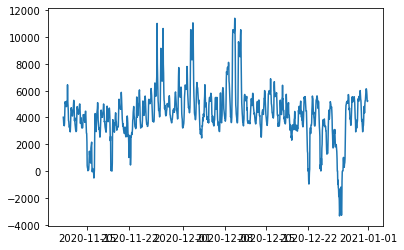

In [20]:
plt.plot(df.full_date, df.value)

#### 2021

In [218]:
test_path = DE_LU_FOLDER+'2021\\Complete\\'

In [219]:
all_files = glob.glob(os.path.join(test_path, "*.csv"))

In [220]:
df = pd.read_csv(all_files[0], index_col=0).reset_index(drop=True)
df.columns = [_.lower() for _ in df.columns]

In [221]:
df['full_date'] = pd.to_datetime(df[['date', 'start time']].agg('-'.join, axis=1))

In [237]:
df.full_date.describe()

C:\Users\marti\AppData\Local\Temp/ipykernel_22388/281816906.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.full_date.describe()


count                    7992
unique                   7991
top       2021-10-31 02:00:00
freq                        2
first     2021-01-01 00:00:00
last      2021-11-29 23:00:00
Name: full_date, dtype: object

Non complet

In [229]:
df.dtypes

date                  object
start time            object
end time              object
value                 object
full_date     datetime64[ns]
dtype: object

In [232]:
df.value = df.value.str.replace(',', '').astype(float)

In [223]:
df.value = df.value.replace('-', np.nan)

In [233]:
df.isna().sum()

date          0
start time    0
end time      0
value         1
full_date     0
dtype: int64

In [226]:
df['daily_mean']

,date,start time,end time,value,full_date
2066,2021-03-28,02:00:00,03:00:00,NaN,2021-03-28 02:00:00


In [235]:
df_daily = df.groupby('date').agg(daily_mean=('value', 'mean'))

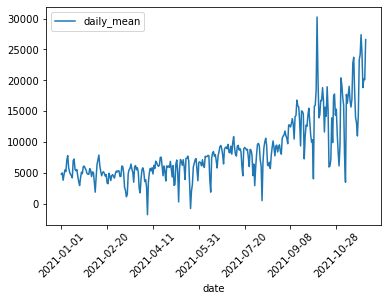

In [243]:
df_daily.plot()
for label in plt.gca().get_xticklabels():
    label.set_rotation(45)

In [247]:
df.full_date.dt.month.nunique()

11

In [245]:
df.full_date.dt.day.nunique()

31

<AxesSubplot:xlabel='full_date'>

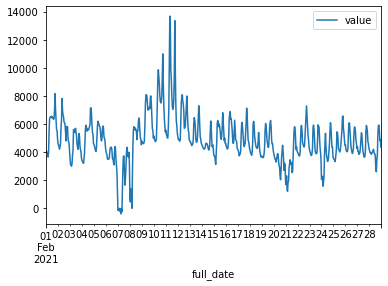

In [252]:
df.loc[df.full_date.dt.month == 2, ['full_date', 'value']].set_index('full_date').plot()

### FR

In [273]:
test_path = FR_FOLDER+'2019\\Complete\\'

In [274]:
all_files = glob.glob(os.path.join(test_path, "*.csv"))

In [276]:
df = pd.read_csv(all_files[0], index_col=0).reset_index(drop=True)
df.columns = [_.lower() for _ in df.columns]

In [279]:
df.value.value_counts()

-    8832
Name: value, dtype: int64